In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

At first let's check the info about our dataset:

In [3]:
display(train_data)
display(test_data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,110,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,120,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,120,80,2,1,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


We have no gaps in our data, thats good, but now we should look at the means and medians that we have:

In [6]:
train_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.322267,74.120615,130.271300,95.689000,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,8.213740,14.341540,212.501152,163.852598,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,50.000000,10.000000,-130.000000,-90.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,198.000000,183.000000,16020.000000,9100.000000,3.000000,3.000000,1.00000,1.000000,1.000000


Now we can see, that next columns need some edits:
* 'ap_hi' (high artherial pressure can't be negative value)
* 'ap_low' same as previous point
* again in that columns, there are some values that are too high (like max values in the description table)

Let's fix that

<AxesSubplot:ylabel='ap_hi'>

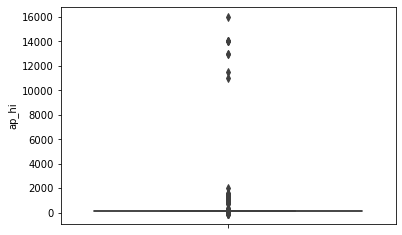

In [8]:
sns.boxplot(data=train_data, y='ap_hi')

<AxesSubplot:ylabel='ap_lo'>

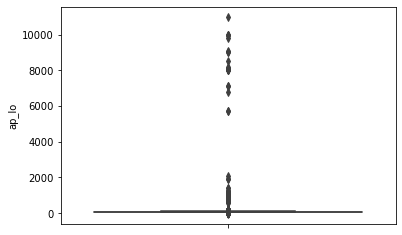

In [9]:
sns.boxplot(data=train_data, y='ap_lo')

So, we can assumed that the values upper 7000 for low and 11000 for systolic pressure values([the lowest border of normal values is about 80 fro diastolic and the systolic is somthing like 120](https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/arterial-pressure). But we know, that here may be some people, who has some diseases, and there values can be lower that normal values. So we move our value's range by 10) are human error and the true value should be a hundred times lower. Let's check this theory: 

In [10]:
train_data[train_data['ap_hi']>11000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [11]:
train_data[train_data['ap_lo']>5000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2381,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1
2985,4208,20398,1,168,78.0,140,8044,3,3,0,0,0,1
6653,9482,19528,1,162,69.0,130,9100,1,1,0,0,1,1
9165,13066,19078,1,165,71.0,120,8000,1,1,0,0,1,1
12086,17260,21466,2,169,78.0,130,9011,1,1,1,1,1,1
14308,20438,18381,1,160,70.0,160,7100,1,1,0,1,1,1
15990,22832,14508,2,179,70.0,120,8500,1,1,0,0,1,0
17738,25348,19573,1,151,57.0,140,8099,1,1,0,0,0,0
20882,29821,19121,1,155,81.0,160,8100,1,1,0,0,1,1
23230,33191,19932,2,170,70.0,112,5700,1,2,0,0,1,1


Ok, looks like we were right. Now we fix it:

In [12]:
def ap_fix(x, more_then, times):
    if x > more_then:
        x= x/times
    return round(abs(x), -1)

In [13]:
df = train_data.copy()
df['ap_hi'] = df['ap_hi'].apply(lambda x: ap_fix(x, 11000, 100))
df['ap_lo'] = df['ap_lo'].apply(lambda x: ap_fix(x, 5000, 100))
df_test = test_data.copy()
df_test['ap_hi'] = df_test['ap_hi'].apply(lambda x: ap_fix(x, 11000, 100))
df_test['ap_lo'] = df_test['ap_lo'].apply(lambda x: ap_fix(x, 5000, 100))
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,127.116143,93.815857,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,28.201553,108.556281,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,2000.000000,2090.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

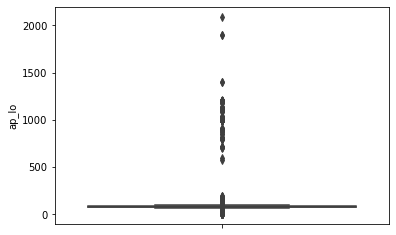

In [14]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

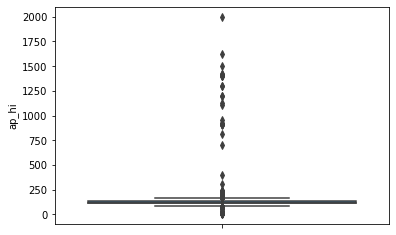

In [15]:
sns.boxplot(data=df, y='ap_hi')

Now we can see that the values more than 500 looks like erroe again. Let's look more close at them:

In [16]:
train_data[train_data['ap_hi']>500]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
17713,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1


In [17]:
train_data[train_data['ap_lo']>500]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


Well, some of this values looks like they are 10 times higher than it should be. Let's fix it

In [18]:
df['ap_hi'] = df['ap_hi'].apply(lambda x: ap_fix(x, 900, 10))
df['ap_lo'] = df['ap_lo'].apply(lambda x: ap_fix(x, 500, 10))
df_test['ap_hi'] = df_test['ap_hi'].apply(lambda x: ap_fix(x, 900, 10))
df_test['ap_lo'] = df_test['ap_lo'].apply(lambda x: ap_fix(x, 500, 10))
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,126.719000,81.608571,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,18.656941,10.196063,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,900.000000,210.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

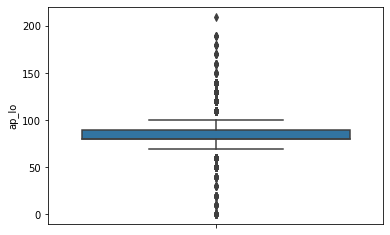

In [19]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

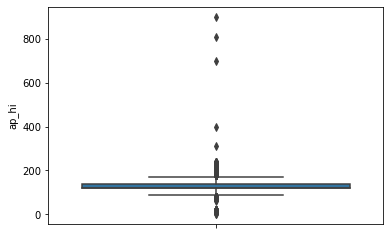

In [20]:
sns.boxplot(data=df, y='ap_hi')

While we worked with that data we saw some zeros in \`ap_hi\` and \`ap_lo\` columns. We can't recover that data, so let's just delete them:

In [21]:
print(f'{(((df["ap_hi"].astype(int) == 0) | (df["ap_lo"].astype(int) == 0)).mean()*100):.4f}%')

0.0343%


We loose less than 1% of our data. Not so bad, as it could be.

In [22]:
df=df.loc[~((df['ap_hi'].astype(int) == 0) | (df['ap_lo'].astype(int) == 0))]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,49971.701212,19468.952327,1.349534,164.359395,74.207918,126.715302,81.631988,1.366912,1.226506,0.088116,0.053776,0.803704,0.499771
std,28852.438340,2467.180675,0.476826,8.210058,14.395302,18.441031,10.082353,0.680274,0.572314,0.283465,0.225576,0.397198,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25005.250000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49999.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74890.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,900.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

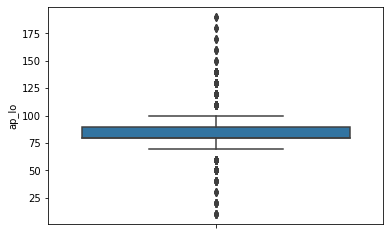

In [23]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

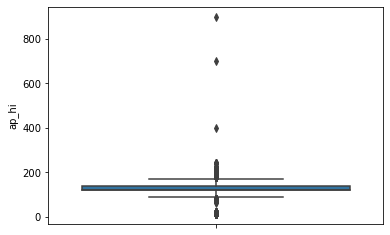

In [24]:
sns.boxplot(data=df, y='ap_hi')

We still have valueas, thats are too high or too low. Let's see, what part of data we will loose, if we just drop them:

In [25]:
print(f'{((((df["ap_hi"].astype(int) > 220) | (df["ap_lo"].astype(int) > 150) & (df["ap_hi"].astype(int) < 100) | (df["ap_lo"].astype(int) < 60))).mean()*100):.4f}%')

0.1944%


Have no regreds to delete them.

In [26]:
df=df.loc[~(((df["ap_hi"].astype(int) > 220) | (df["ap_lo"].astype(int) > 150) & (df["ap_hi"].astype(int) < 100) | (df["ap_lo"].astype(int) < 60)))]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000,69840.000000
mean,49974.648339,19470.483648,1.349728,164.365178,74.218005,126.712199,81.693729,1.366910,1.226604,0.088144,0.053766,0.803623,0.499842
std,28853.330011,2466.767531,0.476887,8.202024,14.387935,17.958196,9.876852,0.680288,0.572470,0.283507,0.225556,0.397260,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,10.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25007.750000,17666.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50000.500000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74898.250000,21327.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,220.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

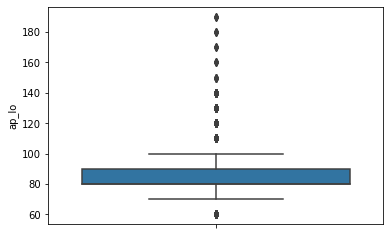

In [27]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

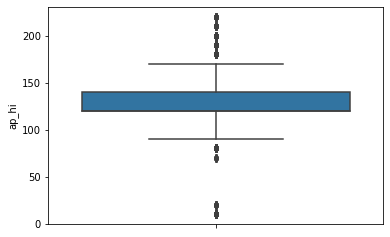

In [28]:
sns.boxplot(data=df, y='ap_hi')

Also we know, the differens between systolic and diastolic pressure is somthing like 30-50 mmHg. Now we filter that rows, that don't follow this rule:

In [29]:
print(f'{((((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) <= 30) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) >= 50)))).mean()*100):.2f}%')

10.34%


The difference is too hight. Let's look, may be there is somwhere differenses, that gives us the negative values.

In [30]:
print(f'{(((df["ap_hi"].astype(int)) - (df["ap_lo"].astype(int))) <= 0).mean()*100:.5f}%')
print(f'{(((df["ap_hi"].astype(int)) - (df["ap_lo"].astype(int))) <= 0).sum()}')

0.39376%
275


In [31]:
df=df.loc[~(((df["ap_hi"].astype(int)) - (df["ap_lo"].astype(int))) <= 0)]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000,69565.000000
mean,49979.796277,19470.934320,1.349659,164.365270,74.217473,127.054697,81.621218,1.367196,1.226393,0.088191,0.053533,0.803738,0.499705
std,28850.230244,2466.773788,0.476866,8.189204,14.392230,16.970141,9.663387,0.680528,0.572167,0.283574,0.225095,0.397172,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25012.000000,17668.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.000000,21328.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

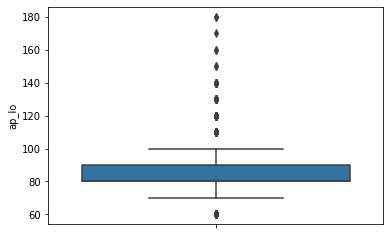

In [32]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

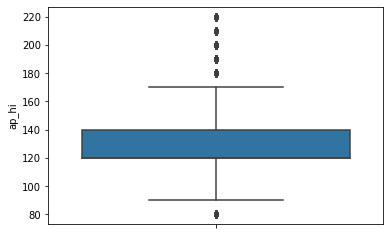

In [33]:
sns.boxplot(data=df, y='ap_hi')

Let's look at that rows, that have difference bigger, that normal value:

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
179,242,18859,2,171,98.0,110.0,90.0,1,1,0,0,1,1
209,288,18169,2,172,62.0,80.0,70.0,1,1,0,0,1,0
335,467,20531,1,162,57.0,100.0,80.0,2,1,0,0,1,0
443,631,17423,1,162,84.0,110.0,90.0,1,1,0,0,1,1
471,678,18032,1,164,54.0,110.0,90.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69786,99675,23131,1,166,68.0,100.0,80.0,1,1,0,0,1,0
69817,99714,15240,1,155,85.0,110.0,90.0,1,1,0,0,1,0
69829,99733,16712,1,164,54.0,100.0,80.0,1,1,0,0,1,0
69912,99861,16002,1,155,48.0,90.0,70.0,1,1,0,0,1,0


<AxesSubplot:>

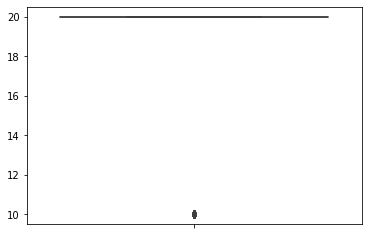

In [34]:
display(df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 30) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))])
ap_hi_sir = df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 30) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))]['ap_hi']
ap_lo_sir = df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 30) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))]['ap_lo']
sns.boxplot(y=(ap_hi_sir - ap_lo_sir))

Now we can see, that the biggest part of this data has only 20 diffirense between systolic and diastolic pressure. My be it's the right data and we just shoud make our range of true values wider.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
209,288,18169,2,172,62.0,80.0,70.0,1,1,0,0,1,0
2396,3373,19752,1,162,58.0,110.0,100.0,2,1,0,0,1,0
3233,4557,22635,2,170,92.0,100.0,90.0,3,1,0,1,0,1
3480,4926,18041,2,175,85.0,100.0,90.0,1,1,0,1,1,0
3501,4957,14800,1,167,67.0,100.0,90.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66410,94810,17990,1,145,69.0,100.0,90.0,2,1,0,0,0,0
67471,96340,17610,1,151,70.0,100.0,90.0,2,1,0,0,1,0
67825,96865,16791,1,157,74.0,100.0,90.0,2,1,0,0,1,1
68021,97151,21701,1,154,64.0,80.0,70.0,1,1,0,1,1,0


<AxesSubplot:>

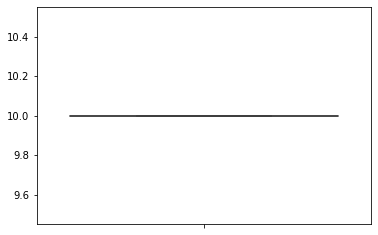

In [35]:
display(df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 20) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))])
ap_hi_sir = df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 20) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))]['ap_hi']
ap_lo_sir = df[(((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 20) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50))))]['ap_lo']
sns.boxplot(y=(ap_hi_sir - ap_lo_sir))

In [36]:
df=df.loc[~((df["ap_hi"].astype(int)-df["ap_lo"].astype(int) < 20) & ((df["ap_hi"].astype(int))-(df["ap_lo"].astype(int) > 50)))]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000,69483.000000
mean,49980.889340,19471.282688,1.349711,164.364737,74.219068,127.088928,81.613632,1.367155,1.226358,0.088194,0.053481,0.803693,0.499863
std,28850.386835,2466.617542,0.476882,8.187926,14.389192,16.947760,9.661136,0.680572,0.572131,0.283579,0.224992,0.397206,0.500004
min,0.000000,10798.000000,1.000000,55.000000,10.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.500000,17668.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50012.000000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74897.500000,21329.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='ap_lo'>

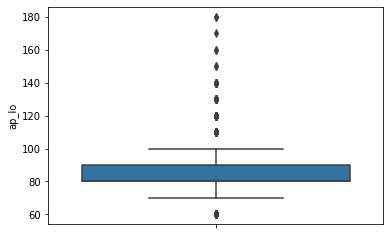

In [37]:
sns.boxplot(data=df, y='ap_lo')

<AxesSubplot:ylabel='ap_hi'>

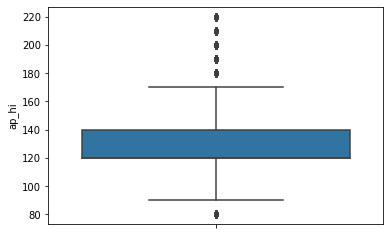

In [38]:
sns.boxplot(data=df, y='ap_hi')

It still has some unusual numbers, but they are looks like possible values.

Ok, now, when we had dropped it, and we have finished with arterial pressure, we will look at height and weight.

<AxesSubplot:ylabel='weight'>

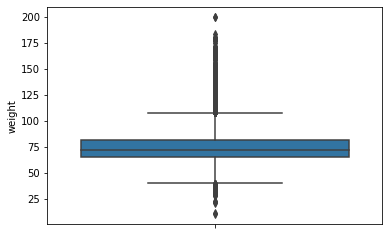

In [39]:
sns.boxplot(data=df, y='weight')

<AxesSubplot:ylabel='height'>

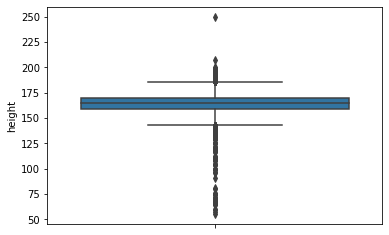

In [40]:
sns.boxplot(data=df, y='height')

In [41]:
print(f'{((df["weight"].astype(int)) < 50).mean()*100:.3f}%')
print(f'{((df["weight"].astype(int)) < 50).sum()}')

1.396%
970


In [42]:
print(f'{((df["weight"].astype(int)) > 125).mean()*100:.5f}%')
print(f'{((df["weight"].astype(int)) > 125).sum()}')

0.49221%
342


In [43]:
print(f'{((df["height"].astype(int)) < 125).mean()*100:.5f}%')
print(f'{((df["height"].astype(int)) < 125).sum()}')

0.12089%
84


In [44]:
print(f'{((df["height"].astype(int)) > 200).mean()*100:.5f}%')
print(f'{((df["height"].astype(int)) > 200).sum()}')

0.00288%
2


In [45]:
df=df.loc[~(
    (
        (df["weight"].astype(int)) < 50) | ((df["weight"].astype(int)) > 125) | ((df["height"].astype(int)) < 125) | ((df["height"].astype(int)) > 200)
)]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000,68094.000000
mean,49932.929964,19479.520501,1.352792,164.550210,74.304803,127.178165,81.664464,1.367272,1.225938,0.088348,0.053661,0.803448,0.501865
std,28841.445886,2462.519270,0.477842,7.772959,13.301449,16.839603,9.600993,0.680925,0.571769,0.283803,0.225349,0.397393,0.500000
min,0.000000,10798.000000,1.000000,125.000000,50.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24952.750000,17688.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49928.500000,19708.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74829.500000,21331.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,200.000000,125.000000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.shape[0]/train_data.shape[0]

0.9727714285714286

Yes, we have lost around 3% of data, but now we can shure that now the data make sence.

We know, that weight without height has no sence. So the thing we now should do is to add nwe colunn with BMI ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)).

In [47]:
def bmi(row):
    return row['weight']/((row['height']/100)**2)

In [48]:
df['bmi'] = df.apply(bmi, axis=1)
df_test['bmi'] = df_test.apply(bmi, axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150.0,80.0,1,1,0,0,1,1,29.384757
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0,26.927438
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,140.0,80.0,1,2,0,0,0,1,27.099251


And now, we will add BMI categories 

| №      | Category | BMI     |
| :---        |    :----:   |          ---: |
| 1      | Underweight (Severe thinness)       | < 16.0   |
| 2   | Underweight (Moderate thinness)        | 16.0 – 16.9    |
| 3   | Underweight (Mild thinness)        | 17.0 – 18.4      |
| 4   | Normal range        | 18.5 – 24.9      |
| 5   | Overweight (Pre-obese)        | 25.0 – 29.9      |
| 6   | Obese (Class I)        | 30.0 – 34.9      |
| 7   | Obese (Class II)        | 35.0 – 39.9      |
| 8   | Obese (Class III)        | ≥ 40.0      |

In [49]:
def bmi_cat(row):
    if row['bmi'] < 16:
        return 1
    elif row['bmi'] < 17:
        return 2
    elif row['bmi'] < 18.5:
        return 3
    elif row['bmi'] < 25:
        return 4
    elif row['bmi'] < 30:
        return 5
    elif row['bmi'] < 35:
        return 6
    elif row['bmi'] < 40:
        return 7
    else:
        return 8

In [50]:
df['bmi_cat'] = df.apply(bmi_cat, axis=1)
df_test['bmi_cat'] = df_test.apply(bmi_cat, axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,4
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,6
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,4
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,5
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0,23.011177,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150.0,80.0,1,1,0,0,1,1,29.384757,5
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0,26.927438,5
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,1,0,1,31.353579,6
69998,99998,22431,1,163,72.0,140.0,80.0,1,2,0,0,0,1,27.099251,5


In [51]:
df['bmi_cat'].unique()

array([4, 6, 5, 7, 8, 3, 1, 2], dtype=int64)

In [52]:
df_g = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
df_c = pd.get_dummies(df['cholesterol'], prefix='cholesterol', drop_first=True)
df_gl = pd.get_dummies(df['gluc'], prefix='gluc', drop_first=True)
df_bc = pd.get_dummies(df['bmi_cat'], prefix='bmi_cat', drop_first=True)
df_ohe = df.join([df_g,df_c,df_gl,df_bc])
df_ohe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cholesterol_3,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,...,1,0,0,0,0,0,0,1,0,0
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150.0,80.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,...,1,0,0,0,0,0,0,1,0,0
69998,99998,22431,1,163,72.0,140.0,80.0,1,2,0,...,0,1,0,0,0,0,1,0,0,0


In [53]:
df_test_g = pd.get_dummies(df_test['gender'], prefix='gender', drop_first=True)
df_test_c = pd.get_dummies(df_test['cholesterol'], prefix='cholesterol', drop_first=True)
df_test_gl = pd.get_dummies(df_test['gluc'], prefix='gluc', drop_first=True)
df_test_bc = pd.get_dummies(df_test['bmi_cat'], prefix='bmi_cat', drop_first=True)
df_test_ohe = df_test.join([df_test_g,df_test_c,df_test_gl,df_test_bc])

Now we are ready to start working with models. Let's start with Linear Regression.

In [54]:
scaler = StandardScaler()
scaler.fit(df_ohe[['age', 'ap_hi', 'ap_lo']])
df_ohe[['age', 'ap_hi', 'ap_lo']] = scaler.transform(df_ohe[['age', 'ap_hi', 'ap_lo']])
df_test_ohe[['age', 'ap_hi', 'ap_lo']] = scaler.transform(df_test_ohe[['age', 'ap_hi', 'ap_lo']])
df_ohe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cholesterol_3,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8
0,0,-0.441226,2,168,62.0,-1.020113,-0.173365,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.303951,1,156,85.0,0.761415,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
2,2,-0.252800,1,165,64.0,0.167573,-1.214932,3,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,-0.753917,2,169,82.0,1.355258,1.909768,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,-0.814424,1,156,56.0,-1.613955,-2.256498,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,0.647504,1,165,80.0,1.355258,-0.173365,1,1,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993,-0.097267,2,168,76.0,-0.426270,-0.173365,1,1,1,...,0,0,0,0,0,0,1,0,0,0
69997,99996,-0.167927,2,183,105.0,3.136785,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
69998,99998,1.198570,1,163,72.0,0.761415,-0.173365,1,2,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
features_col=df_ohe.drop(columns=['id','gender','height','weight', 'cholesterol', 'gluc', 'bmi', 'bmi_cat', 'cardio']).columns.tolist()
target_col='cardio'

In [56]:
features=df_ohe[features_col]
target=df_ohe[target_col]
features_test=df_test_ohe[features_col]
features

,age,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8
0,-0.441226,-1.020113,-0.173365,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0.303951,0.761415,0.868202,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.252800,0.167573,-1.214932,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-0.753917,1.355258,1.909768,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,-0.814424,-1.613955,-2.256498,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.647504,1.355258,-0.173365,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
69995,-0.097267,-0.426270,-0.173365,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
69997,-0.167927,3.136785,0.868202,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
69998,1.198570,0.761415,-0.173365,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [57]:
model_lr = LinearRegression()
lr_score = cross_val_score(model_lr, features, target, cv=5, scoring='roc_auc')
lr_score.mean()

0.7909829079458763

Not so bad, but too low, let's try something more interesting:

In [58]:
params = {'max_depth': range(1,10,2),
          'n_estimators': range(1,100,10),
          'max_leaf_nodes': range(2,20,2)
         }


model_rf = GridSearchCV(RandomForestClassifier(random_state=6574), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    error_score='raise'
                    )

model_rf.fit(features, target)
print('\n',model_rf.best_score_)
print(model_rf.best_params_)


 0.7938695165772444
{'max_depth': 9, 'max_leaf_nodes': 18, 'n_estimators': 71}


Not impressive at all. May be KNN will be better.

In [59]:
params = {'n_neighbors': range(1,15,1)}


model_knn = GridSearchCV(KNeighborsClassifier(), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_knn.fit(features, target)
print(model_knn.best_score_)
print(model_knn.best_params_)

0.7777932886352056
{'n_neighbors': 14}


In [60]:
params = {'num_leaves': range(31,51,5),
          'max_depth': range(1,5,1),
          'n_estimators': range(100, 200, 20)
         }



model_lgb = GridSearchCV(LGBMClassifier(), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_lgb.fit(features, target)
print(model_lgb.best_score_)
print(model_lgb.best_params_)

0.8011266088413083
{'max_depth': 4, 'n_estimators': 100, 'num_leaves': 31}


In [61]:
df_test['predict'] = model_lgb.predict(df_test_ohe[features_col])
df_test['pred_prob'] = model_lgb.predict_proba(df_test_ohe[features_col])[:,1]
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_cat,predict,pred_prob
0,5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783,7,1,0.509216
1,6,19042,2,170,69.0,130.0,90.0,1,1,0,0,1,23.875433,4,1,0.539924
2,7,20432,1,160,70.0,120.0,80.0,1,1,0,0,0,27.343750,5,0,0.453308
3,10,18133,2,185,94.0,130.0,90.0,1,1,0,0,1,27.465303,5,1,0.568111
4,11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578,5,0,0.236727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150.0,90.0,1,1,0,1,0,35.640138,7,1,0.845345
29996,99987,18309,1,172,78.0,110.0,70.0,1,1,0,0,1,26.365603,5,0,0.171061
29997,99989,21247,2,169,61.0,120.0,80.0,1,1,0,0,0,21.357796,4,0,0.457604
29998,99994,14509,2,175,80.0,120.0,80.0,2,1,0,0,0,26.122449,5,0,0.309578


In [65]:
results=pd.read_csv('datasets/sample_submission.csv')

In [66]:
(df_test['id'] == results['id']).count()

30000

In [67]:
results['cardio']=df_test['pred_prob']
results = results.set_index('id')
results

,cardio
id,
5,0.509216
6,0.539924
7,0.453308
10,0.568111
11,0.236727
...,...
99984,0.845345
99987,0.171061
99989,0.457604


In [68]:
results.to_csv('sample_submission_res.csv')

In [69]:
params = {'depth': range(3,6,1),
          'learning_rate': np.arange(0.03, 0.11, 0.015),
          'l2_leaf_reg': range(1,5,1)
          }



model_cb = GridSearchCV(CatBoostClassifier(random_state=6574, verbose=False), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_cb.fit(features, target)
print(model_cb.best_score_)
print(model_cb.best_params_)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
11 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\artem\anaconda3\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\artem\anaconda3\lib\site-packages\catboost\core.py", line 2278, 

0.8014453965440351
{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03}


In [70]:
df_test['predict_cb'] = model_cb.predict(df_test_ohe[features_col])
df_test['pred_prob_cb'] = model_cb.predict_proba(df_test_ohe[features_col])[:,1]
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_cat,predict,pred_prob,predict_cb,pred_prob_cb
0,5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783,7,1,0.509216,1,0.513380
1,6,19042,2,170,69.0,130.0,90.0,1,1,0,0,1,23.875433,4,1,0.539924,1,0.520396
2,7,20432,1,160,70.0,120.0,80.0,1,1,0,0,0,27.343750,5,0,0.453308,0,0.433098
3,10,18133,2,185,94.0,130.0,90.0,1,1,0,0,1,27.465303,5,1,0.568111,1,0.554722
4,11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578,5,0,0.236727,0,0.226948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150.0,90.0,1,1,0,1,0,35.640138,7,1,0.845345,1,0.846488
29996,99987,18309,1,172,78.0,110.0,70.0,1,1,0,0,1,26.365603,5,0,0.171061,0,0.157441
29997,99989,21247,2,169,61.0,120.0,80.0,1,1,0,0,0,21.357796,4,0,0.457604,0,0.437954
29998,99994,14509,2,175,80.0,120.0,80.0,2,1,0,0,0,26.122449,5,0,0.309578,0,0.389916


In [74]:
results_s = pd.read_csv('datasets/sample_submission.csv')
results_s['cardio']=df_test['pred_prob_cb']
results_s = results_s.set_index('id')
results_s

,cardio
id,
5,0.513380
6,0.520396
7,0.433098
10,0.554722
11,0.226948
...,...
99984,0.846488
99987,0.157441
99989,0.437954


In [75]:
results_s.to_csv('sample_submission_res_v2.csv')

In [76]:
df_ohe_ac = df_ohe.copy()
df_test_ohe_ac = df_test_ohe.copy()
df_ohe_ac['age'] = df['age']
df_test_ohe_ac['age'] = df_test['age']
df_ohe_ac

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cholesterol_3,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8
0,0,18393,2,168,62.0,-1.020113,-0.173365,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,0.761415,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
2,2,18857,1,165,64.0,0.167573,-1.214932,3,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,17623,2,169,82.0,1.355258,1.909768,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,17474,1,156,56.0,-1.613955,-2.256498,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,1.355258,-0.173365,1,1,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993,19240,2,168,76.0,-0.426270,-0.173365,1,1,1,...,0,0,0,0,0,0,1,0,0,0
69997,99996,19066,2,183,105.0,3.136785,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
69998,99998,22431,1,163,72.0,0.761415,-0.173365,1,2,0,...,0,1,0,0,0,0,1,0,0,0


In [77]:
df_ohe_ac['age'] = df['age'].apply(lambda x: int(x/365.25))
df_test_ohe_ac['age'] = df_test['age'].apply(lambda x: int(x/365.25))
df_ohe_ac

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cholesterol_3,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8
0,0,50,2,168,62.0,-1.020113,-0.173365,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,55,1,156,85.0,0.761415,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
2,2,51,1,165,64.0,0.167573,-1.214932,3,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,48,2,169,82.0,1.355258,1.909768,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,47,1,156,56.0,-1.613955,-2.256498,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,165,80.0,1.355258,-0.173365,1,1,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993,52,2,168,76.0,-0.426270,-0.173365,1,1,1,...,0,0,0,0,0,0,1,0,0,0
69997,99996,52,2,183,105.0,3.136785,0.868202,3,1,0,...,1,0,0,0,0,0,0,1,0,0
69998,99998,61,1,163,72.0,0.761415,-0.173365,1,2,0,...,0,1,0,0,0,0,1,0,0,0


In [78]:
pd.qcut(df_ohe_ac['age'], 5)

0          (47.0, 51.0]
1          (51.0, 55.0]
2          (47.0, 51.0]
3          (47.0, 51.0]
4        (28.999, 47.0]
              ...      
69994      (55.0, 59.0]
69995      (51.0, 55.0]
69997      (51.0, 55.0]
69998      (59.0, 64.0]
69999      (55.0, 59.0]
Name: age, Length: 68094, dtype: category
Categories (5, interval[float64, right]): [(28.999, 47.0] < (47.0, 51.0] < (51.0, 55.0] < (55.0, 59.0] < (59.0, 64.0]]

In [79]:
def age_cat(row):
    if row['age'] <= 47:
        return 1
    elif row['age'] > 47 and row['age'] <= 51:
        return 2
    elif row['age'] > 51 and row['age'] <= 55:
        return 3
    elif row['age'] > 55 and row['age'] <= 59:
        return 4
    else:
        return 5

In [80]:
df_ohe_ac['age_cat']=df_ohe_ac.apply(age_cat, axis=1)
df_test_ohe_ac['age_cat']=df_test_ohe_ac.apply(age_cat, axis=1)
df_ohe_ac

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,gluc_2,gluc_3,bmi_cat_2,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8,age_cat
0,0,50,2,168,62.0,-1.020113,-0.173365,1,1,0,...,0,0,0,0,1,0,0,0,0,2
1,1,55,1,156,85.0,0.761415,0.868202,3,1,0,...,0,0,0,0,0,0,1,0,0,3
2,2,51,1,165,64.0,0.167573,-1.214932,3,1,0,...,0,0,0,0,1,0,0,0,0,2
3,3,48,2,169,82.0,1.355258,1.909768,1,1,0,...,0,0,0,0,0,1,0,0,0,2
4,4,47,1,156,56.0,-1.613955,-2.256498,1,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,165,80.0,1.355258,-0.173365,1,1,0,...,0,0,0,0,0,1,0,0,0,4
69995,99993,52,2,168,76.0,-0.426270,-0.173365,1,1,1,...,0,0,0,0,0,1,0,0,0,3
69997,99996,52,2,183,105.0,3.136785,0.868202,3,1,0,...,0,0,0,0,0,0,1,0,0,3
69998,99998,61,1,163,72.0,0.761415,-0.173365,1,2,0,...,1,0,0,0,0,1,0,0,0,5


In [81]:
df_ac = pd.get_dummies(df_ohe_ac['age_cat'], prefix='age_cat', drop_first=True)
df_test_ac = pd.get_dummies(df_test_ohe_ac['age_cat'], prefix='age_cat', drop_first=True)
df_ohe_ac = df_ohe_ac.join(df_ac)
df_test_ohe_ac = df_test_ohe_ac.join(df_test_ac)
df_ohe_ac

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8,age_cat,age_cat_2,age_cat_3,age_cat_4,age_cat_5
0,0,50,2,168,62.0,-1.020113,-0.173365,1,1,0,...,1,0,0,0,0,2,1,0,0,0
1,1,55,1,156,85.0,0.761415,0.868202,3,1,0,...,0,0,1,0,0,3,0,1,0,0
2,2,51,1,165,64.0,0.167573,-1.214932,3,1,0,...,1,0,0,0,0,2,1,0,0,0
3,3,48,2,169,82.0,1.355258,1.909768,1,1,0,...,0,1,0,0,0,2,1,0,0,0
4,4,47,1,156,56.0,-1.613955,-2.256498,1,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,165,80.0,1.355258,-0.173365,1,1,0,...,0,1,0,0,0,4,0,0,1,0
69995,99993,52,2,168,76.0,-0.426270,-0.173365,1,1,1,...,0,1,0,0,0,3,0,1,0,0
69997,99996,52,2,183,105.0,3.136785,0.868202,3,1,0,...,0,0,1,0,0,3,0,1,0,0
69998,99998,61,1,163,72.0,0.761415,-0.173365,1,2,0,...,0,1,0,0,0,5,0,0,0,1


In [82]:
features_col_ac=df_ohe_ac.drop(columns=['id','gender','height','weight', 'cholesterol', 'gluc', 'bmi', 'bmi_cat', 'cardio', 'age', 'age_cat']).columns.tolist()
features_ac = df_ohe_ac[features_col_ac]
features_test_ac = df_test_ohe_ac[features_col_ac]
features_ac

,ap_hi,ap_lo,smoke,alco,active,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,...,bmi_cat_3,bmi_cat_4,bmi_cat_5,bmi_cat_6,bmi_cat_7,bmi_cat_8,age_cat_2,age_cat_3,age_cat_4,age_cat_5
0,-1.020113,-0.173365,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.761415,0.868202,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.167573,-1.214932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1.355258,1.909768,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,-1.613955,-2.256498,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1.355258,-0.173365,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
69995,-0.426270,-0.173365,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
69997,3.136785,0.868202,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
69998,0.761415,-0.173365,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [83]:
params = {'depth': range(3,6,1),
          'learning_rate': np.arange(0.03, 0.11, 0.015),
          'l2_leaf_reg': range(1,5,1)
          }



model_cb_ac = GridSearchCV(CatBoostClassifier(random_state=6574, verbose=False), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_cb_ac.fit(features_ac, target)
print(model_cb_ac.best_score_)
print(model_cb_ac.best_params_)

0.7988490053310157
{'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.03}


In [84]:
df_test['predict_cb_ac'] = model_cb_ac.predict(df_test_ohe_ac[features_col_ac])
df_test['pred_prob_cb_ac'] = model_cb_ac.predict_proba(df_test_ohe_ac[features_col_ac])[:,1]
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_cat,predict,pred_prob,predict_cb,pred_prob_cb,predict_cb_ac,pred_prob_cb_ac
0,5,18888,1,154,85.0,130.0,80.0,1,1,0,0,1,35.840783,7,1,0.509216,1,0.513380,0,0.469012
1,6,19042,2,170,69.0,130.0,90.0,1,1,0,0,1,23.875433,4,1,0.539924,1,0.520396,1,0.533380
2,7,20432,1,160,70.0,120.0,80.0,1,1,0,0,0,27.343750,5,0,0.453308,0,0.433098,0,0.389470
3,10,18133,2,185,94.0,130.0,90.0,1,1,0,0,1,27.465303,5,1,0.568111,1,0.554722,1,0.552822
4,11,16093,2,170,76.0,120.0,80.0,1,1,0,0,1,26.297578,5,0,0.236727,0,0.226948,0,0.215453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150.0,90.0,1,1,0,1,0,35.640138,7,1,0.845345,1,0.846488,1,0.849929
29996,99987,18309,1,172,78.0,110.0,70.0,1,1,0,0,1,26.365603,5,0,0.171061,0,0.157441,0,0.156182
29997,99989,21247,2,169,61.0,120.0,80.0,1,1,0,0,0,21.357796,4,0,0.457604,0,0.437954,0,0.442410
29998,99994,14509,2,175,80.0,120.0,80.0,2,1,0,0,0,26.122449,5,0,0.309578,0,0.389916,0,0.419387


In [85]:
results_s_ac = pd.read_csv('datasets/sample_submission.csv')
results_s_ac['cardio']=df_test['pred_prob_cb_ac']
results_s_ac = results_s_ac.set_index('id')
results_s_ac

,cardio
id,
5,0.469012
6,0.533380
7,0.389470
10,0.552822
11,0.215453
...,...
99984,0.849929
99987,0.156182
99989,0.442410


In [86]:
results_s_ac.to_csv('sample_submission_res_v3.csv')

In [87]:
params = {'num_leaves': range(31,51,5),
          'max_depth': range(1,5,1),
          'n_estimators': range(100, 200, 20)
         }



model_lgb_ac = GridSearchCV(LGBMClassifier(), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_lgb_ac.fit(features_ac, target)
print(model_lgb_ac.best_score_)
print(model_lgb_ac.best_params_)

0.7985726364682971
{'max_depth': 4, 'n_estimators': 160, 'num_leaves': 31}


In [88]:
df_test['predict_lgb_ac'] = model_lgb_ac.predict(df_test_ohe_ac[features_col_ac])
df_test['predict_prob_lgb_ac'] = model_lgb_ac.predict_proba(df_test_ohe_ac[features_col_ac])[:,1]
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,bmi,bmi_cat,predict,pred_prob,predict_cb,pred_prob_cb,predict_cb_ac,pred_prob_cb_ac,predict_lgb_ac,predict_prob_lgb_ac
0,5,18888,1,154,85.0,130.0,80.0,1,1,0,...,35.840783,7,1,0.509216,1,0.513380,0,0.469012,0,0.473876
1,6,19042,2,170,69.0,130.0,90.0,1,1,0,...,23.875433,4,1,0.539924,1,0.520396,1,0.533380,1,0.553213
2,7,20432,1,160,70.0,120.0,80.0,1,1,0,...,27.343750,5,0,0.453308,0,0.433098,0,0.389470,0,0.388712
3,10,18133,2,185,94.0,130.0,90.0,1,1,0,...,27.465303,5,1,0.568111,1,0.554722,1,0.552822,1,0.570333
4,11,16093,2,170,76.0,120.0,80.0,1,1,0,...,26.297578,5,0,0.236727,0,0.226948,0,0.215453,0,0.217751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150.0,90.0,1,1,0,...,35.640138,7,1,0.845345,1,0.846488,1,0.849929,1,0.868377
29996,99987,18309,1,172,78.0,110.0,70.0,1,1,0,...,26.365603,5,0,0.171061,0,0.157441,0,0.156182,0,0.151509
29997,99989,21247,2,169,61.0,120.0,80.0,1,1,0,...,21.357796,4,0,0.457604,0,0.437954,0,0.442410,0,0.442062
29998,99994,14509,2,175,80.0,120.0,80.0,2,1,0,...,26.122449,5,0,0.309578,0,0.389916,0,0.419387,0,0.405931


In [89]:
results_s_ac_lgb = pd.read_csv('datasets/sample_submission.csv')
results_s_ac_lgb['cardio']=df_test['predict_prob_lgb_ac']
results_s_ac_lgb = results_s_ac_lgb.set_index('id')
results_s_ac_lgb

,cardio
id,
5,0.473876
6,0.553213
7,0.388712
10,0.570333
11,0.217751
...,...
99984,0.868377
99987,0.151509
99989,0.442062


In [90]:
results_s_ac_lgb.to_csv('sample_submission_res_v4.csv')

In [91]:
features_col_no=df.drop(columns=['id','gender', 'cholesterol', 'gluc', 'cardio', 'bmi_cat', 'bmi']).columns.tolist()
features_no = df[features_col_no]
features_test_no = df_test[features_col_no]
features_no

,age,height,weight,ap_hi,ap_lo,smoke,alco,active
0,18393,168,62.0,110.0,80.0,0,0,1
1,20228,156,85.0,140.0,90.0,0,0,1
2,18857,165,64.0,130.0,70.0,0,0,0
3,17623,169,82.0,150.0,100.0,0,0,1
4,17474,156,56.0,100.0,60.0,0,0,0
...,...,...,...,...,...,...,...,...
69994,21074,165,80.0,150.0,80.0,0,0,1
69995,19240,168,76.0,120.0,80.0,1,0,1
69997,19066,183,105.0,180.0,90.0,0,1,0
69998,22431,163,72.0,140.0,80.0,0,0,0


In [92]:
params = {'depth': range(3,6,1),
          'learning_rate': np.arange(0.03, 0.11, 0.015),
          'l2_leaf_reg': range(1,5,1)
          }



model_cb_no = GridSearchCV(CatBoostClassifier(random_state=6574, verbose=False), 
                    param_grid = params, 
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1,
                    )

model_cb_no.fit(features_no, target)
print(model_cb_no.best_score_)
print(model_cb_no.best_params_)

0.791389195615175
{'depth': 3, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
